In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\ASUS\Downloads\CC GENERAL.csv")
data=data.drop("CUST_ID", axis=1)

In [2]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print(data.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [5]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

# hierarchical clustering

In [6]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 10 clusters, using euclidean distance as a metric
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


# Plot the clusters

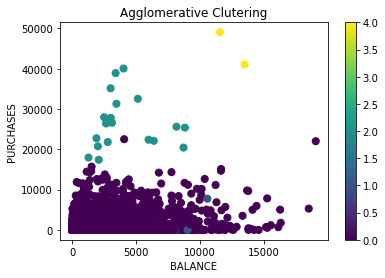

In [7]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

# Dendrogram

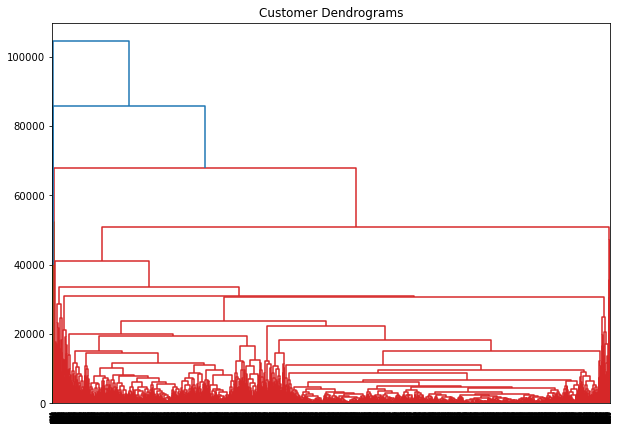

In [9]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

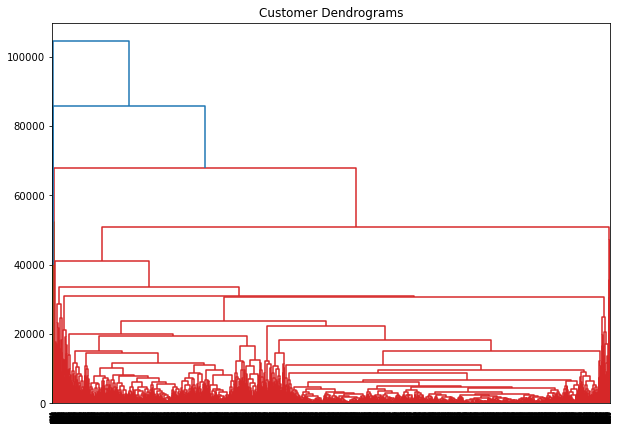

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

[[1.64537108e+03 9.06571096e-01 1.45419148e+03 9.06744948e+02
  5.47837125e+02 8.37160309e+02 5.79867638e-01 3.29338718e-01
  4.01525477e-01 1.16996605e-01 2.74395161e+00 2.08137097e+01
  6.83100257e+03 2.00861580e+03 6.51292434e+02 1.96350019e-01
  1.17564516e+01]
 [4.77562301e+03 9.07656920e-01 1.17303879e+04 8.39438634e+03
  3.33619804e+03 5.15643806e+03 7.66152580e-01 6.22972723e-01
  6.10439875e-01 2.05018920e-01 8.76785714e+00 8.89910714e+01
  1.26651786e+04 1.90125148e+04 2.44038946e+03 3.56370107e-01
  1.18571429e+01]
 [7.90668870e+02 8.48861241e-01 4.87194995e+02 2.33808544e+02
  2.53687507e+02 4.86816632e+02 4.46712142e-01 1.26616459e-01
  3.43942985e-01 1.10376268e-01 2.30770652e+00 9.21604140e+00
  2.19408273e+03 8.77458997e+02 5.31582199e+02 1.45499032e-01
  1.13716503e+01]
 [5.47822012e+03 9.57426814e-01 1.53169429e+03 9.44610426e+02
  5.87159001e+02 3.83993108e+03 4.72730906e-01 2.67277979e-01
  3.49923368e-01 3.29140566e-01 9.69023569e+00 2.15005612e+01
  1.09480971e+04

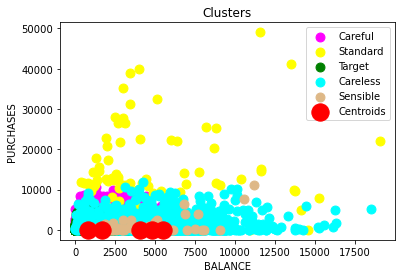

In [11]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.
data['labels']=labels
plt.scatter(data["BALANCE"][data.labels == 0],data["PURCHASES"][data.labels == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.labels == 1],data["PURCHASES"][data.labels == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.labels == 2],data["PURCHASES"][data.labels == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][data.labels == 3],data["PURCHASES"][data.labels == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][data.labels == 4],data["PURCHASES"][data.labels == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

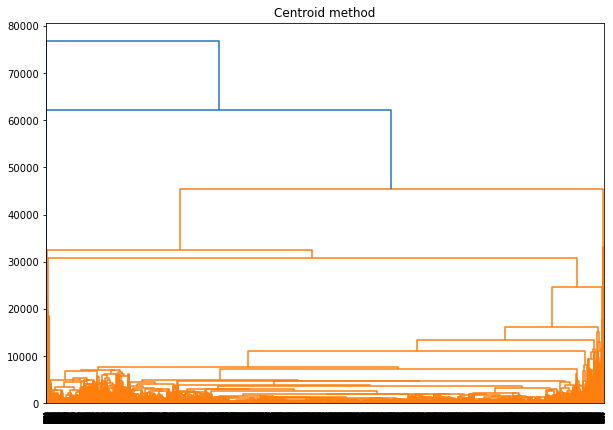

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.figure(figsize=(10,7))
plt.title("Centroid method")
dend=shc.dendrogram(shc.linkage(data, method="centroid"))

[[7.60261662e+02 8.48061975e-01 4.61803711e+02 2.18780875e+02
  2.43244089e+02 4.25240549e+02 4.43117727e-01 1.20639274e-01
  3.42228014e-01 1.06606753e-01 2.15300325e+00 8.84598214e+00
  2.02060978e+03 8.08117202e+02 4.95996224e+02 1.40454939e-01
  1.13476055e+01 2.00000000e+00]
 [2.51902333e+03 9.69907120e-01 7.09848004e+03 4.85863197e+03
  2.24203785e+03 5.42940490e+02 9.13448365e-01 7.24552091e-01
  7.01863544e-01 7.24120474e-02 1.96350365e+00 8.00109489e+01
  8.21423358e+03 6.91084536e+03 1.19365054e+03 3.30732358e-01
  1.19452555e+01 9.41605839e-01]
 [1.51805067e+03 8.74619381e-01 1.52993848e+03 9.54332398e+02
  5.75706496e+02 4.05426021e+02 6.48973186e-01 3.96130277e-01
  4.37036947e-01 6.35234549e-02 1.17418033e+00 2.10860656e+01
  1.20654713e+04 2.02781410e+03 4.96540081e+02 2.63894135e-01
  1.17643443e+01 1.09426230e+00]
 [3.67719227e+03 9.54341491e-01 4.96359210e+02 2.81713476e+02
  2.14678800e+02 3.23702042e+03 3.09283251e-01 1.36646231e-01
  2.09053805e-01 3.59200844e-01 9

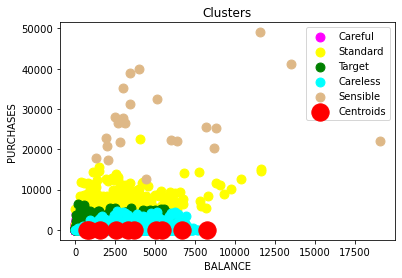

In [13]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=10, random_state=0)  #Cluster our data by choosing 10 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)
labels
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.
data['labels']=labels
plt.scatter(data["BALANCE"][data.labels == 0],data["PURCHASES"][data.labels == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["BALANCE"][data.labels == 1],data["PURCHASES"][data.labels == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["BALANCE"][data.labels == 2],data["PURCHASES"][data.labels == 2],s=80,c='green',label='Target')
plt.scatter(data["BALANCE"][data.labels == 3],data["PURCHASES"][data.labels == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["BALANCE"][data.labels == 4],data["PURCHASES"][data.labels == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [ ]:
#The second methode is clearer than the first one